# **Modeling**

# Part 1: Preparing the Data

In [424]:
import pandas as pd
import numpy as np
np.random.seed(4)
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [425]:
os.getcwd()

'/workspace'

In [426]:
data = pd.read_csv('Crime_Clean2.csv')

In [427]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Other Race %,Month,Day,Hour_Minute,Hour,Hour_Y,Hour_X,Time_of_Day,Season,Weekday
0,0,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,12,2019-12-06,21:16,21,0.707107,-0.707107,Night,Fall,1.0
1,1,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,0.007143,4,2019-04-13,02:00,2,0.866025,0.500000,Late Night,Spring,0.0
2,2,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,0.007143,3,2020-03-13,09:09,9,-0.707107,0.707107,Morning,Winter,1.0
3,3,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,11,2019-11-15,16:33,16,-0.500000,-0.866025,Late Afternoon/Early Evening,Fall,1.0
4,4,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,0.007143,7,2016-07-22,22:27,22,0.866025,-0.500000,Night,Summer,1.0


In [428]:
len(data)

235368

In [429]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [430]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [431]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [432]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']
data = data[data['Crime Name1'] != 'Not a Crime']

In [433]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [434]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed', 'Crime Name2','Male','Female','Black','White','Asian','Other Race',
                 'American Indian','Male %', 'Female %','American Indian %', 'Other Race %', 'Asian %','Month','Hour_Minute','Season',
                 'Hour_X','Hour_Y','Hour','City'],1)

In [435]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'Longitude', 'Latitude', 'High School %',
       'Bachelors %', 'Public Transportation %', 'Unemployed %', 'White %',
       'Black %', 'Day', 'Time_of_Day', 'Weekday'],
      dtype='object')

In [436]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=20, random_state=4).fit(data[['Latitude','Longitude']])
preds = clusterer.predict(data[['Latitude','Longitude']])
data['Cluster_No'] = preds

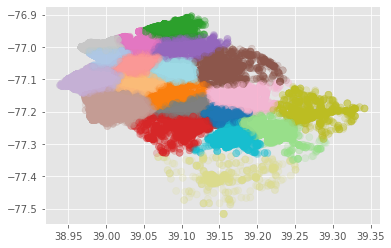

In [440]:
X = np.array(data[['Latitude','Longitude']], dtype='float64')
plt.scatter(X[:,0],X[:,1], alpha=0.2, s=50, c = data['Cluster_No'], cmap='tab20')
plt.show()

In [441]:
data_clust = data[['Cluster_No','Latitude','Longitude']]

data_clust2 = pd.DataFrame(data_clust.groupby(['Cluster_No']).mean())

In [442]:
data = pd.merge(data_clust2, data, how='left', on='Cluster_No')

In [443]:
data = data.drop(['Block','Location'],axis=1)

In [444]:
data.head()

,Cluster_No,Latitude_x,Longitude_x,Incident ID,Police District Name,Crime Name1,Crime Name3,Victims,Place,Pop,...,Latitude_y,High School %,Bachelors %,Public Transportation %,Unemployed %,White %,Black %,Day,Time_of_Day,Weekday
0,0,39.152632,-77.206552,201267436,MONTGOMERY VILLAGE,Crime Against Society,DRIVING UNDER THE INFLUENCE LIQUOR,1,Street - In vehicle,2111.0,...,39.149109,0.108555,0.312006,0.080184,0.033214,0.709398,0.043855,2019-11-22,Late Night,1.0
1,0,39.152632,-77.206552,201268261,MONTGOMERY VILLAGE,Crime Against Society,LIQUOR - POSSESS,1,Street - In vehicle,2111.0,...,39.149109,0.108555,0.312006,0.080184,0.033214,0.709398,0.043855,2019-12-06,Late Night,1.0
2,0,39.152632,-77.206552,201268261,MONTGOMERY VILLAGE,Crime Against Society,DRIVING UNDER THE INFLUENCE LIQUOR,1,Street - In vehicle,2111.0,...,39.149109,0.108555,0.312006,0.080184,0.033214,0.709398,0.043855,2019-12-06,Late Night,1.0
3,0,39.152632,-77.206552,201296384,MONTGOMERY VILLAGE,Crime Against Property,LARCENY - FROM AUTO,1,Street - Residential,920.0,...,39.138933,0.088983,0.194915,0.146293,0.056926,0.633886,0.004739,2020-07-29,Early Morning,1.0
4,0,39.152632,-77.206552,201088750,MONTGOMERY VILLAGE,Crime Against Property,ROBBERY - STREET-STRONG-ARM,1,Parking Lot - Other,920.0,...,39.141412,0.088983,0.194915,0.146293,0.056926,0.633886,0.004739,2016-07-12,Late Night,1.0


In [445]:
data['Crimes Against Society Count'] = 0
data['Crimes Against Property Count'] = 0
data['Crimes Against Persons Count'] = 0

In [446]:
df = data.groupby(['Cluster_No','Day']).size().reset_index(name='Count')
df

,Cluster_No,Day,Count
0,0,2016-07-01,11
1,0,2016-07-02,35
2,0,2016-07-03,15
3,0,2016-07-04,9
4,0,2016-07-05,21
...,...,...,...
30697,19,2021-01-30,3
30698,19,2021-01-31,4
30699,19,2021-02-01,1
30700,19,2021-02-02,7


In [447]:
df2 = data.groupby(['Cluster_No','Day','Crime Name1']).size().reset_index(name='Count')
df2

,Cluster_No,Day,Crime Name1,Count
0,0,2016-07-01,Crime Against Person,2
1,0,2016-07-01,Crime Against Property,4
2,0,2016-07-01,Crime Against Society,5
3,0,2016-07-02,Crime Against Person,6
4,0,2016-07-02,Crime Against Property,11
...,...,...,...,...
63254,19,2021-01-31,Crime Against Property,3
63255,19,2021-02-01,Crime Against Property,1
63256,19,2021-02-02,Crime Against Person,1
63257,19,2021-02-02,Crime Against Property,6


In [448]:
df2 = data[data['Crime Name1'] == 'Crime Against Person'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Person Count')
df2

,Cluster_No,Day,Crime Against Person Count
0,0,2016-07-01,2
1,0,2016-07-02,6
2,0,2016-07-03,2
3,0,2016-07-04,1
4,0,2016-07-05,2
...,...,...,...
14081,19,2021-01-28,1
14082,19,2021-01-29,1
14083,19,2021-01-30,1
14084,19,2021-01-31,1


In [449]:
df2b = data[data['Crime Name1'] == 'Crime Against Property'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Property Count')
df2b

,Cluster_No,Day,Crime Against Property Count
0,0,2016-07-01,4
1,0,2016-07-02,11
2,0,2016-07-03,4
3,0,2016-07-04,3
4,0,2016-07-05,8
...,...,...,...
28320,19,2021-01-30,1
28321,19,2021-01-31,3
28322,19,2021-02-01,1
28323,19,2021-02-02,6


In [450]:
df2c = data[data['Crime Name1'] == 'Crime Against Society'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Society Count')
df2c

,Cluster_No,Day,Crime Against Society Count
0,0,2016-07-01,5
1,0,2016-07-02,18
2,0,2016-07-03,9
3,0,2016-07-04,5
4,0,2016-07-05,11
...,...,...,...
20843,19,2021-01-15,2
20844,19,2021-01-19,1
20845,19,2021-01-20,1
20846,19,2021-01-28,1


In [451]:
df3 = data.groupby(['Cluster_No','Day','Place']).size().reset_index(name='Count')
df3

,Cluster_No,Day,Place,Count
0,0,2016-07-01,Hotel/Motel/Etc.,1
1,0,2016-07-01,Other/Unknown,1
2,0,2016-07-01,Parking Lot - Residential,1
3,0,2016-07-01,Restaurant,1
4,0,2016-07-01,Retail - Department/Discount Store,1
...,...,...,...,...
134617,19,2021-02-02,Parking Lot - Residential,1
134618,19,2021-02-02,Residence - Apartment/Condo,1
134619,19,2021-02-02,Street - Residential,1
134620,19,2021-02-03,Residence - Driveway,1


In [452]:
df4 = data.groupby(['Cluster_No','Day','Time_of_Day']).size().reset_index(name='Count')
df4

,Cluster_No,Day,Time_of_Day,Count
0,0,2016-07-01,Afternoon,1
1,0,2016-07-01,Late Night,5
2,0,2016-07-01,Morning,1
3,0,2016-07-01,Night,4
4,0,2016-07-02,Afternoon,1
...,...,...,...,...
95707,19,2021-02-02,Late Night,2
95708,19,2021-02-02,Morning,2
95709,19,2021-02-02,Night,1
95710,19,2021-02-03,Late Afternoon/Early Evening,1


In [453]:
df5 = data.groupby(['Cluster_No','Day','Weekday']).size().reset_index(name='Count')
df5

,Cluster_No,Day,Weekday,Count
0,0,2016-07-01,1.0,11
1,0,2016-07-02,0.0,35
2,0,2016-07-03,0.0,15
3,0,2016-07-04,1.0,9
4,0,2016-07-05,1.0,21
...,...,...,...,...
30697,19,2021-01-30,0.0,3
30698,19,2021-01-31,0.0,4
30699,19,2021-02-01,1.0,1
30700,19,2021-02-02,1.0,7


In [454]:
df6 = data.groupby(['Cluster_No','Day'])
df6b = df6['Income'].mean().reset_index(name='Mean Income')
df6b


,Cluster_No,Day,Mean Income
0,0,2016-07-01,85389.272727
1,0,2016-07-02,70663.742857
2,0,2016-07-03,60633.666667
3,0,2016-07-04,62687.555556
4,0,2016-07-05,68942.952381
...,...,...,...
30697,19,2021-01-30,62305.000000
30698,19,2021-01-31,96935.500000
30699,19,2021-02-01,73159.000000
30700,19,2021-02-02,91998.285714


In [455]:
df6c = df6['Pop'].mean().reset_index(name='Mean Pop')
df6c

,Cluster_No,Day,Mean Pop
0,0,2016-07-01,2269.727273
1,0,2016-07-02,1649.914286
2,0,2016-07-03,2482.400000
3,0,2016-07-04,1824.111111
4,0,2016-07-05,1901.190476
...,...,...,...
30697,19,2021-01-30,2724.333333
30698,19,2021-01-31,2198.000000
30699,19,2021-02-01,1978.000000
30700,19,2021-02-02,1439.142857


In [456]:
df6d = df6['Public Transportation %'].mean().reset_index(name='Mean Public Transportation %')
df6d

,Cluster_No,Day,Mean Public Transportation %
0,0,2016-07-01,0.105908
1,0,2016-07-02,0.086069
2,0,2016-07-03,0.106510
3,0,2016-07-04,0.155012
4,0,2016-07-05,0.100541
...,...,...,...
30697,19,2021-01-30,0.179354
30698,19,2021-01-31,0.197263
30699,19,2021-02-01,0.217012
30700,19,2021-02-02,0.108646


In [457]:
df6e = df6['Victims'].mean().reset_index(name='Mean Victims')
df6e

,Cluster_No,Day,Mean Victims
0,0,2016-07-01,1.090909
1,0,2016-07-02,1.057143
2,0,2016-07-03,1.066667
3,0,2016-07-04,1.111111
4,0,2016-07-05,1.047619
...,...,...,...
30697,19,2021-01-30,1.333333
30698,19,2021-01-31,1.000000
30699,19,2021-02-01,1.000000
30700,19,2021-02-02,1.142857


In [458]:
df_final = pd.merge(df, df6b, how='left', on=['Cluster_No','Day'])
df_final.head()

,Cluster_No,Day,Count,Mean Income
0,0,2016-07-01,11,85389.272727
1,0,2016-07-02,35,70663.742857
2,0,2016-07-03,15,60633.666667
3,0,2016-07-04,9,62687.555556
4,0,2016-07-05,21,68942.952381


In [459]:
df_final = pd.merge(df_final, df6c, how='left', on=['Cluster_No','Day'])
df_final = pd.merge(df_final, df6d, how='left', on=['Cluster_No','Day'])
df_final = pd.merge(df_final, df6e, how='left', on=['Cluster_No','Day'])
df_final.head()

,Cluster_No,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,0,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909
1,0,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143
2,0,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667
3,0,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111
4,0,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619


In [460]:
df_final2 = pd.merge(data_clust2, df_final, how='left', on='Cluster_No')
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619
...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857


In [461]:
df_final2 = pd.merge(df_final2,df2, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0
...,...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333,1.0
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000,1.0
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000,NaN
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857,1.0


In [462]:
df_final2 = pd.merge(df_final2,df2b, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,4.0
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,11.0
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,4.0
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,3.0
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333,1.0,1.0
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000,1.0,3.0
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000,NaN,1.0
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857,1.0,6.0


In [463]:
df_final2 = pd.merge(df_final2,df2c, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,4.0,5.0
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,11.0,18.0
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,4.0,9.0
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,3.0,5.0
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333,1.0,1.0,1.0
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000,1.0,3.0,NaN
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000,NaN,1.0,NaN
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857,1.0,6.0,NaN


In [464]:
def func(data, df_final):
    
    for place in np.unique(data['Place']):
        
        df2 = data[data['Place'] == place].groupby(['Cluster_No','Day']).size().reset_index(name=place + " Count")
        df_final = pd.merge(df_final,df2, how='left', on=['Cluster_No','Day'])
        
    return df_final

In [465]:
df_final3 = func(data,df_final2)
df_final3.shape

(30702, 95)

In [466]:
df_final3.head()

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,...,Retail - Video Store Count,School/College Count,Street - Alley Count,Street - Bus Stop Count,Street - Commercial Count,Street - In vehicle Count,Street - Other Count,Street - Residential Count,Theater Count,Wooded Area Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,...,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,...,NaN,NaN,NaN,NaN,2.0,9.0,NaN,8.0,NaN,NaN
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,...,NaN,NaN,NaN,NaN,1.0,5.0,NaN,1.0,NaN,NaN
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,1.0,NaN,NaN


In [467]:
len(df_final3)

30702

In [468]:
data = df_final3.copy()

In [469]:
rand = data[data['Cluster_No'] == 0]
len(rand)

1679

In [470]:
data['30 Rolling Crimes Against Society Count'] = 0
data['30 Rolling Crimes Against Property Count'] = 0
data['30 Rolling Crimes Against Persons Count'] = 0
data['7 Rolling Crimes Against Society Count'] = 0
data['7 Rolling Crimes Against Property Count'] = 0
data['7 Rolling Crimes Against Persons Count'] = 0
data['1 Rolling Crimes Against Society Count'] = 0
data['1 Rolling Crimes Against Property Count'] = 0
data['1 Rolling Crimes Against Persons Count'] = 0

In [471]:
np.unique(data['Cluster_No'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [472]:
def cluster_func(data):
    
    dataframe_list = []
    
    for cluster in np.unique(data['Cluster_No']):
        
        data_new = data[data['Cluster_No'] == cluster].copy()
        
        data_new['30 Rolling Crimes Against Society Count'] = data_new['Crime Against Society Count'].rolling(30).mean()
        data_new['30 Rolling Crimes Against Property Count'] = data_new['Crime Against Property Count'].rolling(30).mean()
        data_new['30 Rolling Crimes Against Persons Count'] = data_new['Crime Against Person Count'].rolling(30).mean()
        
        data_new['7 Rolling Crimes Against Society Count'] = data_new['Crime Against Society Count'].rolling(7).mean()
        data_new['7 Rolling Crimes Against Property Count'] = data_new['Crime Against Property Count'].rolling(7).mean()
        data_new['7 Rolling Crimes Against Persons Count'] = data_new['Crime Against Person Count'].rolling(7).mean()
        

        data_new['2 Rolling Crimes Against Society Count'] = data_new['Crime Against Society Count'].rolling(2).mean()
        data_new['2 Rolling Crimes Against Property Count'] = data_new['Crime Against Property Count'].rolling(2).mean()
        data_new['2 Rolling Crimes Against Persons Count'] = data_new['Crime Against Person Count'].rolling(2).mean()
        
        dataframe_list.append(data_new)
        
    return dataframe_list

In [473]:
data_final = cluster_func(data)

In [474]:
len(data_final)

20

In [475]:
data_final[0].head(9)

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,...,30 Rolling Crimes Against Persons Count,7 Rolling Crimes Against Society Count,7 Rolling Crimes Against Property Count,7 Rolling Crimes Against Persons Count,1 Rolling Crimes Against Society Count,1 Rolling Crimes Against Property Count,1 Rolling Crimes Against Persons Count,2 Rolling Crimes Against Society Count,2 Rolling Crimes Against Property Count,2 Rolling Crimes Against Persons Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,...,NaN,NaN,NaN,NaN,0,0,0,11.5,7.5,4.0
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,...,NaN,NaN,NaN,NaN,0,0,0,13.5,7.5,4.0
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,...,NaN,NaN,NaN,NaN,0,0,0,7.0,3.5,1.5
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,...,NaN,NaN,NaN,NaN,0,0,0,8.0,5.5,1.5
5,0,39.152632,-77.206552,2016-07-06,17,70584.176471,1855.529412,0.127799,1.058824,2.0,...,NaN,NaN,NaN,NaN,0,0,0,6.5,10.5,2.0
6,0,39.152632,-77.206552,2016-07-07,14,71334.000000,1839.857143,0.112096,1.357143,3.0,...,NaN,7.714286,7.142857,2.571429,0,0,0,3.0,10.0,2.5
7,0,39.152632,-77.206552,2016-07-08,11,75196.636364,2395.090909,0.144368,1.090909,1.0,...,NaN,7.714286,7.285714,2.428571,0,0,0,4.5,6.0,2.0
8,0,39.152632,-77.206552,2016-07-09,10,82115.300000,2193.100000,0.103158,1.000000,1.0,...,NaN,5.714286,6.428571,1.714286,0,0,0,4.5,5.0,1.0


In [476]:
len(data_final[0])

1679

In [477]:
data_final[0]['30 Rolling Crimes Against Property Count'].isnull().sum()

524

In [478]:
for i in range(len(data_final)):
    data_final[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    data_final[i].fillna(0,inplace=True)

In [479]:
data_final[0]['30 Rolling Crimes Against Property Count'].isnull().sum()

0

In [480]:
def get_labels(data):

    labels1 = []
    labels2 = []
    labels3 = []

    for i in range(len(data_final)):
        label1 = np.array(data[i]['Crime Against Society Count'])
        label2 = np.array(data[i]['Crime Against Property Count'])
        label3 = np.array(data[i]['Crime Against Person Count'])

        labels1.append(label1)
        labels2.append(label2)
        labels3.append(label3)

    return labels1, labels2, labels3

In [481]:
labels1, labels2, labels3 = get_labels(data_final)

In [482]:
features = data_final[0].copy()

In [483]:
for i in range(len(data_final)):
    data_final[i] = data_final[i].drop(['Count','Day','Crime Against Society Count','Crime Against Property Count', 'Crime Against Person Count',
                             'Cluster_No'],axis=1)

In [484]:
data_final[0].head()

,Latitude,Longitude,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Air/Bus/Train/Metro Terminal Count,Auto Dealership Count,Auto Repair Count,Bank - ATM Count,...,30 Rolling Crimes Against Persons Count,7 Rolling Crimes Against Society Count,7 Rolling Crimes Against Property Count,7 Rolling Crimes Against Persons Count,1 Rolling Crimes Against Society Count,1 Rolling Crimes Against Property Count,1 Rolling Crimes Against Persons Count,2 Rolling Crimes Against Society Count,2 Rolling Crimes Against Property Count,2 Rolling Crimes Against Persons Count
0,39.152632,-77.206552,85389.272727,2269.727273,0.105908,1.090909,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
1,39.152632,-77.206552,70663.742857,1649.914286,0.086069,1.057143,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,11.5,7.5,4.0
2,39.152632,-77.206552,60633.666667,2482.400000,0.106510,1.066667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,13.5,7.5,4.0
3,39.152632,-77.206552,62687.555556,1824.111111,0.155012,1.111111,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,7.0,3.5,1.5
4,39.152632,-77.206552,68942.952381,1901.190476,0.100541,1.047619,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0,0,8.0,5.5,1.5


In [485]:
data_final[0].isnull().sum()

Latitude                                   0
Longitude                                  0
Mean Income                                0
Mean Pop                                   0
Mean Public Transportation %               0
                                          ..
1 Rolling Crimes Against Property Count    0
1 Rolling Crimes Against Persons Count     0
2 Rolling Crimes Against Society Count     0
2 Rolling Crimes Against Property Count    0
2 Rolling Crimes Against Persons Count     0
Length: 101, dtype: int64

In [486]:
from sklearn.model_selection import train_test_split

training = []
testing = []
train_labels = []
test_labels = []

for i in range(len(data_final)):

    train, test, train_label, test_label = train_test_split(data_final[i],labels1[i], test_size=0.25)
    training.append(train)
    testing.append(test)
    train_labels.append(train_label)
    test_labels.append(test_label)

In [487]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae_list = []
mse_list = []
mape_list = []

model = RandomForestRegressor()

for i in range(len(data_final)):
    model.fit(training[i], train_labels[i])
    predictions = model.predict(testing[i])
    mae = mean_absolute_error(test_labels[i], predictions)
    mse = mean_squared_error(test_labels[i], predictions)
    mape = mean_absolute_percentage_error(test_labels[i], predictions)
    mae_list.append(mae)
    mse_list.append(mse)
    mape_list.append(mape)

In [488]:
results = pd.DataFrame({'MAE Scores': [mae_list[0], mae_list[1], mae_list[2], mae_list[3], mae_list[4], mae_list[5],
                                           mae_list[6], mae_list[7], mae_list[8], mae_list[9], mae_list[10], mae_list[11], mae_list[12], 
                                       mae_list[13], mae_list[14], mae_list[15], mae_list[16], mae_list[17], mae_list[18], mae_list[19]],
                        'MSE Scores': [mse_list[0], mse_list[1], mse_list[2], mse_list[3], mse_list[4], mse_list[5],
                                           mse_list[6], mse_list[7], mse_list[8], mse_list[9], mse_list[10], mse_list[11], mse_list[12], 
                                       mse_list[13], mse_list[14], mse_list[15], mse_list[16], mse_list[17], mse_list[18], mse_list[19]],
                        'MAPE Scores': [mape_list[0], mape_list[1], mape_list[2], mape_list[3], mape_list[4], mape_list[5],
                                           mape_list[6], mape_list[7], mape_list[8], mape_list[9], mape_list[10], mape_list[11], mape_list[12], 
                                       mape_list[13], mape_list[14], mape_list[15], mape_list[16], mape_list[17], mape_list[18], mape_list[19]]
                       })

                       
results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7',
                'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15',
                'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19']

In [489]:
results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,1.003357,1.739913,1.232056e+14
Cluster 1,1.376437,3.288581,1.284756e+14
Cluster 2,0.830478,1.215437,2.893940e+14
Cluster 3,0.630861,0.801174,3.764492e+14
Cluster 4,0.506364,0.617672,4.813430e+14
Cluster 5,0.454578,0.484992,4.084279e+14
Cluster 6,0.430525,0.457063,5.562205e+14
Cluster 7,1.274489,3.248004,1.570376e+14
Cluster 8,0.355099,0.358528,3.402709e+14
Cluster 9,0.611579,0.979370,5.173752e+14


In [500]:
test_features = features[1259:]
test_features.head()

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,...,30 Rolling Crimes Against Persons Count,7 Rolling Crimes Against Society Count,7 Rolling Crimes Against Property Count,7 Rolling Crimes Against Persons Count,1 Rolling Crimes Against Society Count,1 Rolling Crimes Against Property Count,1 Rolling Crimes Against Persons Count,2 Rolling Crimes Against Society Count,2 Rolling Crimes Against Property Count,2 Rolling Crimes Against Persons Count
1259,0,39.152632,-77.206552,2019-12-13,2,59731.000000,2085.000000,0.084754,1.000000,0.0,...,0.0,2.285714,3.571429,0.0,0,0,0,1.5,2.0,0.0
1260,0,39.152632,-77.206552,2019-12-14,8,60198.375000,1854.500000,0.136727,1.000000,1.0,...,0.0,2.571429,3.000000,0.0,0,0,0,3.0,1.5,0.0
1261,0,39.152632,-77.206552,2019-12-15,9,82089.888889,2134.222222,0.097751,1.000000,2.0,...,0.0,2.428571,3.000000,0.0,0,0,0,5.0,2.0,1.5
1262,0,39.152632,-77.206552,2019-12-16,5,67292.000000,1735.200000,0.119054,1.000000,1.0,...,0.0,2.571429,3.000000,0.0,0,0,0,3.5,2.0,1.5
1263,0,39.152632,-77.206552,2019-12-17,6,54716.500000,1769.666667,0.070129,1.166667,1.0,...,0.0,3.000000,2.428571,0.0,0,0,0,3.0,1.5,1.0


In [501]:
dates = pd.to_datetime(test_features['Day'])
dates

1259   2019-12-13
1260   2019-12-14
1261   2019-12-15
1262   2019-12-16
1263   2019-12-17
          ...    
1674   2021-01-31
1675   2021-02-01
1676   2021-02-02
1677   2021-02-03
1678   2021-02-04
Name: Day, Length: 420, dtype: datetime64[ns]

In [502]:
model.fit(training[0], train_labels[0])
predictions = model.predict(testing[0])

In [503]:
len(test_labels[0])

420

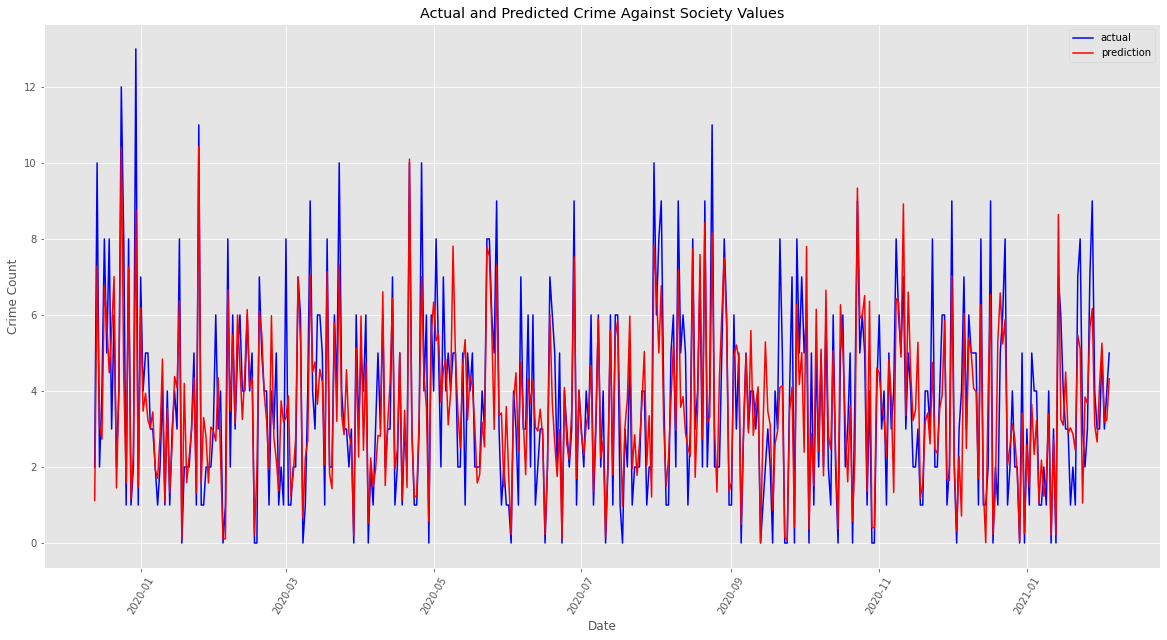

In [504]:
plt.plot(dates, test_labels[0], 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Society Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()